# getting the data

## Zhe HUANG, 22208901 ##

Today, we will work with the UN General Debate dataset. The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.
Work on this data is proposed in the book 

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- from here, but rather it's easier to use the version on my server. 
  - https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/data/un-general-debates/un-general-debates-blueprint.csv.gz



## downloading some toy data

only once!

In [1]:
# start it only if you don't have your data yet!
# you can also simply get the zip, unzip and put it manuaylly next to your notbook
# https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz

# !wget https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz
# import gzip, shutil
# with open('un-general-debates-blueprint.csv.gz', 'rb') as f_in:
#     with gzip.open('un-general-debates-blueprint.csv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)
        

In [2]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
# in order to stop using the autotimer:
# %unload_ext autotime

time: 117 µs (started: 2023-03-17 00:09:27 +01:00)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import re

time: 1.29 s (started: 2023-03-17 00:09:27 +01:00)


In [4]:
df = pd.read_csv("./un-general-debates-blueprint.csv")
df.sample(22) #, random_state=53)

,session,year,country,country_name,speaker,position,text
2830,45,1990,MWI,Malawi,KATOPOLA,NaN,﻿\nOn behalf of the Malawi delegation. I have ...
3581,50,1995,BEN,Benin,Mr. Monnou,Minister for Foreign Affairs,"You have the difficult and noble task, Sir, of..."
3171,47,1992,PAN,Panama,ENDARA GALIMANY,President,I \nconsider it a great honour to speak before...
408,28,1973,RWA,Rwanda,Nsekalije,NaN,"﻿104.\tSir, your election to the presidency of..."
3019,46,1991,SLB,Solomon Islands,Sir Peter KENILOREA,NaN,"﻿Mr. President, allow me to begin by warmly co..."
3991,52,1997,HRV,Croatia,Mate Granic,Minister for Foreign Affairs,﻿It is a special privilege and\nhonour for me ...
230,27,1972,GMB,Gambia,Mr. Saho,NaN,Permit me to offer my sincere congratulations ...
6094,63,2008,NRU,Nauru,Marcus Stephen,President,I offer my congratulations to \nMr. Miguel d’E...
377,28,1973,LBY,Libya,Maghur,NaN,﻿61.\tI should like to express my delegation's...
4545,55,2000,KGZ,Kyrgyzstan,Elmira Ibraimova,UN Representative,"At the outset, Sir,\nI take this opportunity t..."


time: 1.35 s (started: 2023-03-17 00:09:28 +01:00)


## Let's get to know the data (and Pandas):

In [5]:
df.columns, df.dtypes

(Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
        'text'],
       dtype='object'),
 session          int64
 year             int64
 country         object
 country_name    object
 speaker         object
 position        object
 text            object
 dtype: object)

time: 2.36 ms (started: 2023-03-17 00:09:29 +01:00)


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 232.1 MB
time: 11.9 ms (started: 2023-03-17 00:09:30 +01:00)


## Adding the "length" column, describing the dataframe

In [7]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


time: 13 ms (started: 2023-03-17 00:09:30 +01:00)


#### 🚧 todo: how long did the longest speech last?

length in characters: how much is one page (11pt)?  English ~ 600 words. 

That's approximately how many characters (including spaces)?

xxxx

What's your guess for 
German? French? Russian? Thai? Japanese?

In English, how many words per minute? ~ 150



In [8]:
# how many words for the longest speech?
print(72000/6)
# 🚧 todo:
# how many pages for the longest speech?
print((72000/6)/600)

# how long to read one page?
print(600/150)

# how long to read the longest speech?
print((72000/6)/150,'minutes')


12000.0
20.0
4.0
80.0 minutes
time: 352 µs (started: 2023-03-17 00:09:30 +01:00)


## mean < average -> ?

terms you probably know: mode ? mean ? average ?

In [9]:
df[['country', 'speaker']].describe().T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


time: 8.26 ms (started: 2023-03-17 00:09:30 +01:00)


## NaN ≠ NA
NaN means 0/0. NaN stands for Not a Number

NA is generally interpreted as a missing value and has various forms - NA_integer_, NA_real_, etc.

https://stats.stackexchange.com/questions/5686/what-is-the-difference-between-nan-and-na

In [10]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

time: 6.52 ms (started: 2023-03-17 00:09:30 +01:00)


In [11]:
df[df['position'].isna()]

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911
...,...,...,...,...,...,...,...,...
4797,56,2001,SWZ,Eswatini,NaN,NaN,﻿It is an honour and\nprivilege for me to deli...,14469
6594,66,2011,EU,European Union,NaN,NaN,Europe presents to you a message of \ncooperat...,11804
6982,68,2013,EU,European Union,NaN,NaN,A year ago \nwhen we met in the General Assemb...,11477
7175,69,2014,EU,European Union,NaN,NaN,The world today is much more dangerous than \n...,10617


time: 7.03 ms (started: 2023-03-17 00:09:30 +01:00)


In [12]:
df['speaker'].fillna('unkown', inplace=True)
df['position'].fillna('unkown', inplace=True)
df[df['position'].isna()]

,session,year,country,country_name,speaker,position,text,length


time: 4.41 ms (started: 2023-03-17 00:09:30 +01:00)


# categorical values vs numerical values

In [13]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

time: 4.61 ms (started: 2023-03-17 00:09:30 +01:00)


<AxesSubplot: >

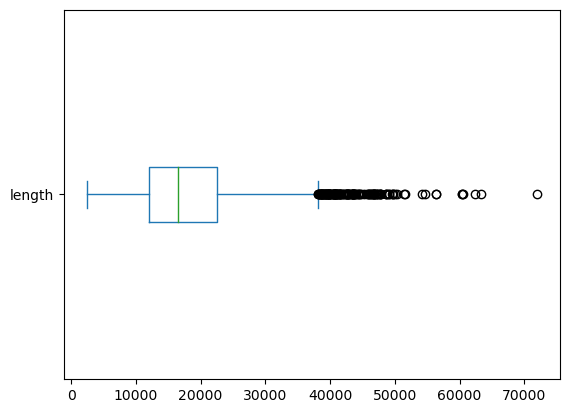

time: 84.5 ms (started: 2023-03-17 00:09:30 +01:00)


In [14]:
df['length'].plot(kind='box', vert=False)


<AxesSubplot: ylabel='Frequency'>

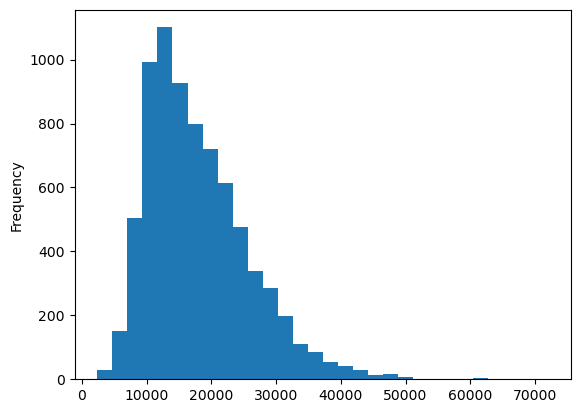

time: 107 ms (started: 2023-03-17 00:09:30 +01:00)


In [15]:
df['length'].plot(kind='hist', bins=30) # , figsize=(8,2)

### Kernel density estimation

https://en.wikipedia.org/wiki/Kernel_density_estimation

if error: "FutureWarning: `distplot` is a deprecated function"

update scipy: `pip3 install --upgrade scipy `

if it persists
    

In [16]:
# only if you got warnings!!!
import warnings
warnings.filterwarnings("ignore")

time: 268 µs (started: 2023-03-17 00:09:30 +01:00)


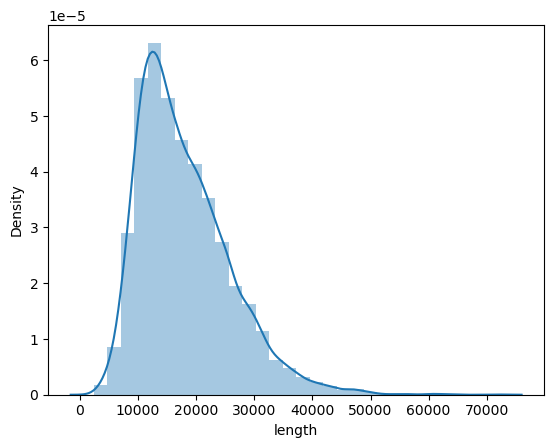

time: 166 ms (started: 2023-03-17 00:09:30 +01:00)


In [17]:
#plt.figure(figsize=(8, 2))
sns.distplot(df['length'], bins=30, kde=True);

# Seaborn docs?
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.distplot.html

## from where?

catplot shows the relationship between a numerical and one or more categorical variables.
https://seaborn.pydata.org/generated/seaborn.catplot.html

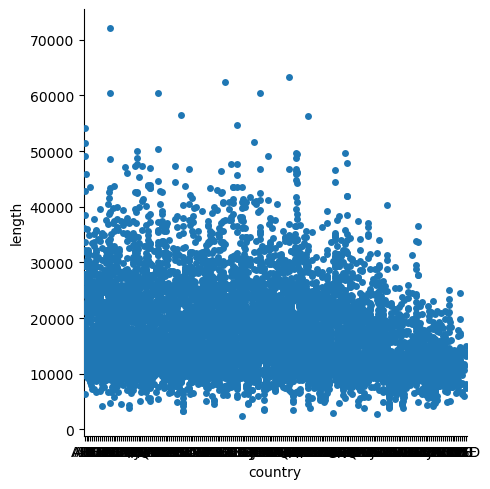

time: 1.99 s (started: 2023-03-17 00:09:30 +01:00)


In [18]:
sns.catplot(data=df, x="country", y="length")

In [19]:
# how to build a selection:
df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

0       False
1       False
2       False
3       False
4       False
        ...  
7502    False
7503    False
7504    False
7505    False
7506    False
Name: country, Length: 7507, dtype: bool

time: 2.89 ms (started: 2023-03-17 00:09:32 +01:00)


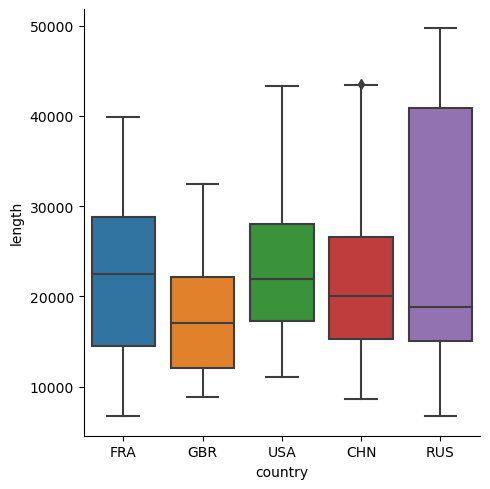

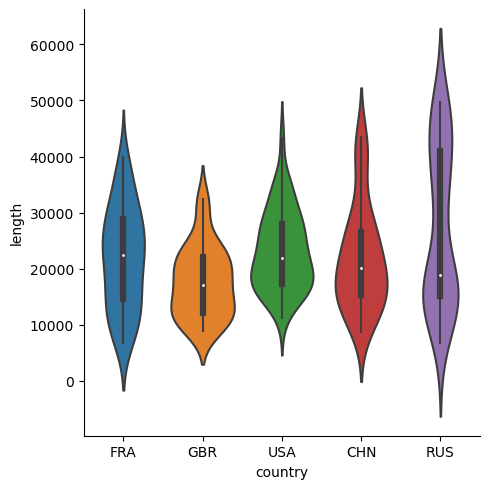

time: 256 ms (started: 2023-03-17 00:09:32 +01:00)


In [20]:
# using the selection
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="length", kind='box')
sns.catplot(data=df[where], x="country", y="length", kind='violin')

## significant differences?

Student test? Anova ?

if the boxes (marking the quartiles) don't overlap each other and the sample size is at least 10, then the two groups being compared should have different medians at the 5% level: https://stats.stackexchange.com/questions/262495/reading-box-and-whisker-plots-possible-to-glean-significant-differences-between

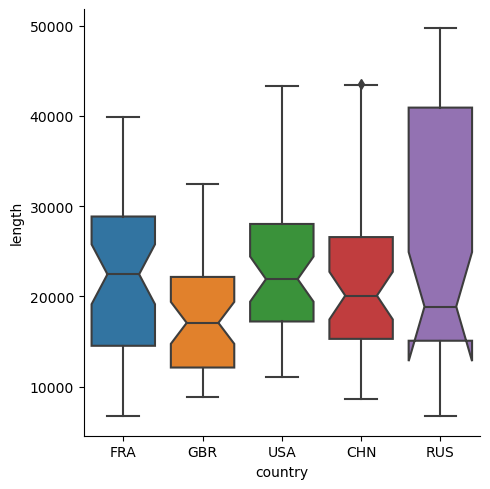

time: 111 ms (started: 2023-03-17 00:09:33 +01:00)


In [21]:
sns.catplot(data=df[where], x="country", y="length", kind='box', notch= True)

## time?

size() returns the number of rows per group  
Why number of countries?

<AxesSubplot: title={'center': 'Number of Countries'}, xlabel='year'>

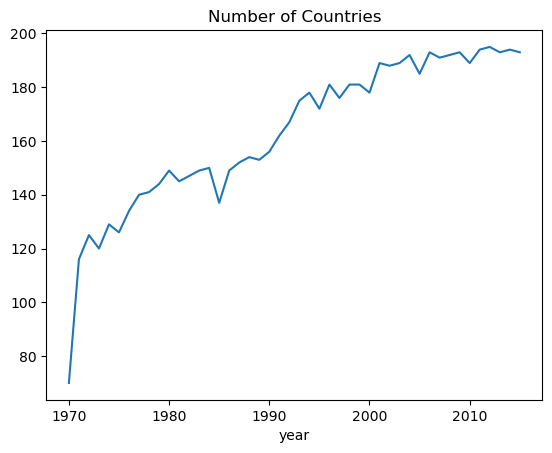

time: 148 ms (started: 2023-03-17 00:09:33 +01:00)


In [22]:
df.groupby('year').size().plot(title="Number of Countries")

when more people want to speak, ...?

<AxesSubplot: title={'center': 'Avg. Speech Length'}, xlabel='year'>

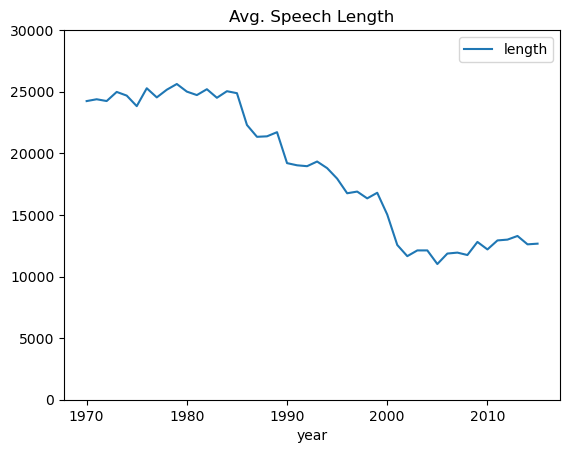

time: 96.1 ms (started: 2023-03-17 00:09:33 +01:00)


In [23]:
df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000))

# Tokenization

### 🚧 todo:
Describe in one sentence the difference between the tokenizations. Which one is your favorite and why?


In [24]:
# 1.
text = "Let's all together defeat last year's problem, SARS-CoV-2, in 2022!"
'|'.join(text.split()),len(text.split())

("Let's|all|together|defeat|last|year's|problem,|SARS-CoV-2,|in|2022!", 10)

time: 1.7 ms (started: 2023-03-17 00:09:33 +01:00)


In [25]:
# 2.
nochar = re.compile('\W+')
'|'.join(nochar.split(text)),len(nochar.split(text))

('Let|s|all|together|defeat|last|year|s|problem|SARS|CoV|2|in|2022|', 15)

time: 1.89 ms (started: 2023-03-17 00:09:33 +01:00)


In [26]:
# 3.
nochar = re.compile('(\W+)')
'|'.join(nochar.split(text)),len(nochar.split(text))

("Let|'|s| |all| |together| |defeat| |last| |year|'|s| |problem|, |SARS|-|CoV|-|2|, |in| |2022|!|",
 29)

time: 1.42 ms (started: 2023-03-17 00:09:33 +01:00)


These tokennizations splits the text by different things:  
The first tokenization splits the text by whitespace; the second tokenization splits the text by non-alphanumeric characters; the third tokenization splits the text by non-alphanumeric characters and preserves them as separate tokens.  

The fourth one is my favorite because it allows for the preservation of relevant information, such as hyphenated words or alphanumeric identifiers, while still separating the text into individual tokens. 

In [27]:
#4.
charorhyphen = re.compile(r'[\w-]+')
'|'.join(charorhyphen.findall(text)),len(charorhyphen.findall(text))

('Let|s|all|together|defeat|last|year|s|problem|SARS-CoV-2|in|2022', 12)

time: 1.52 ms (started: 2023-03-17 00:09:33 +01:00)


### using a specialized class: nltk

In [28]:
#5.
'|'.join(word_tokenize(text)),len(word_tokenize(text))

("Let|'s|all|together|defeat|last|year|'s|problem|,|SARS-CoV-2|,|in|2022|!",
 15)

time: 6.69 ms (started: 2023-03-17 00:09:33 +01:00)


Note that these are idiosyncratic rules for English. Think of *viens-tu*, *où va-t-il*, *Kaffeetasse*, *cantolo*, *我爱你*, ...

and it's slow!

In [29]:
for t in tqdm(df['text'][:100]):
    toks = word_tokenize(t)

  0%|          | 0/100 [00:00<?, ?it/s]

time: 1.67 s (started: 2023-03-17 00:09:33 +01:00)


### so be patient for this line:

In [30]:
df['tokens'] = df['text'].map(word_tokenize)
df['num_tokens'] = df['tokens'].map(len)

time: 1min 27s (started: 2023-03-17 00:09:35 +01:00)


In [31]:
display(df)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,unkown,33: May I first convey to our President the co...,51419,"[33, :, May, I, first, convey, to, our, Presid...",9072
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unkown,177.\t : It is a fortunate coincidence that pr...,29286,"[177., :, It, is, a, fortunate, coincidence, t...",5184
2,25,1970,AUS,Australia,Mr. McMAHON,unkown,100.\t It is a pleasure for me to extend to y...,31839,"[100, ., It, is, a, pleasure, for, me, to, ext...",5695
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unkown,155.\t May I begin by expressing to Ambassado...,26616,"[155, ., May, I, begin, by, expressing, to, Am...",4708
4,25,1970,BEL,Belgium,Mr. HARMEL,unkown,"176. No doubt each of us, before coming up to ...",25911,"[176, ., No, doubt, each, of, us, ,, before, c...",4789
...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[On, behalf, of, the, people, and, the, Govern...",1898
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[Seventy, years, have, passed, since, the, est...",4583
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[I, should, like, to, congratulate, the, Presi...",2388
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[I, would, like, to, begin, by, thanking, the,...",2445


time: 26.2 ms (started: 2023-03-17 00:11:02 +01:00)


In [32]:
df['num_tokens'] = df['tokens'].map(len)

time: 2.64 ms (started: 2023-03-17 00:11:02 +01:00)


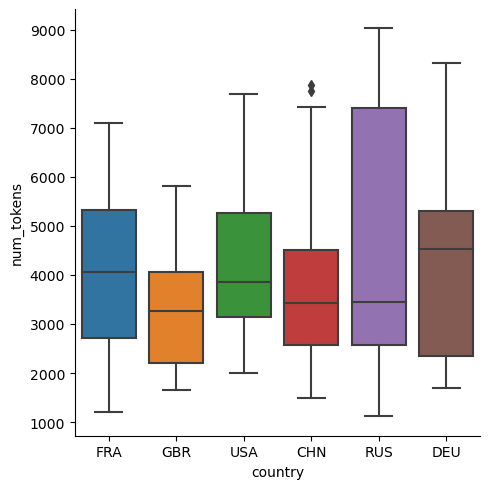

time: 300 ms (started: 2023-03-17 00:11:02 +01:00)


In [33]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'FRG', 'DEU'])
sns.catplot(data=df[where], x="country", y="num_tokens", kind='box')

## 🚧 todo: When speaking English, do Germans use longer words?

- Compare to English natives and French speakers using notched box plots.
- Is the result significant?
- How do you explain this?

In [34]:
# 🚧 todo:
df['avg_wordsize'] = df['length']/df['num_tokens']
display(df)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,avg_wordsize
0,25,1970,ALB,Albania,Mr. NAS,unkown,33: May I first convey to our President the co...,51419,"[33, :, May, I, first, convey, to, our, Presid...",9072,5.667879
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unkown,177.\t : It is a fortunate coincidence that pr...,29286,"[177., :, It, is, a, fortunate, coincidence, t...",5184,5.649306
2,25,1970,AUS,Australia,Mr. McMAHON,unkown,100.\t It is a pleasure for me to extend to y...,31839,"[100, ., It, is, a, pleasure, for, me, to, ext...",5695,5.590694
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unkown,155.\t May I begin by expressing to Ambassado...,26616,"[155, ., May, I, begin, by, expressing, to, Am...",4708,5.653356
4,25,1970,BEL,Belgium,Mr. HARMEL,unkown,"176. No doubt each of us, before coming up to ...",25911,"[176, ., No, doubt, each, of, us, ,, before, c...",4789,5.410524
...,...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[On, behalf, of, the, people, and, the, Govern...",1898,5.567966
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[Seventy, years, have, passed, since, the, est...",4583,5.548767
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[I, should, like, to, congratulate, the, Presi...",2388,5.721106
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[I, would, like, to, begin, by, thanking, the,...",2445,5.826994


time: 18.5 ms (started: 2023-03-17 00:11:03 +01:00)


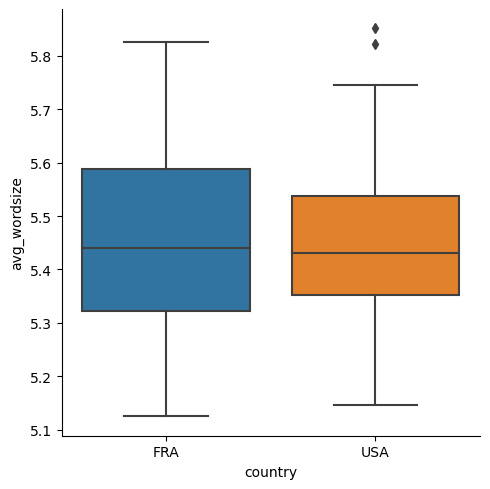

time: 105 ms (started: 2023-03-17 00:11:03 +01:00)


In [35]:
# 🚧 todo:
where = df['country'].isin(['USA', 'FRA'])
sns.catplot(data=df[where], x='country', y="avg_wordsize", kind='box')

#### 🚧 todo:
answer:  
The result is not significant. French speakers sometimes use longer words than USA people.

This is because French language has different spelling rules and French has a larger vocabulary than English.

# Let's Zipf it!
## skim through this section if you have followed Hands-on NLP!
but execute the code so that we have the freq_df and start again at word clouds
### Let's first flatten the list

In [36]:
alltoks = [item for sublist in df['tokens'] for item in sublist] 
len(alltoks)

23572348

time: 419 ms (started: 2023-03-17 00:11:03 +01:00)


In [37]:
text = "Let's all together defeat last year's problem, SARS-CoV-2, in 2021!"
tokens = word_tokenize(text)
counter = Counter(tokens)
counter

Counter({'Let': 1,
         "'s": 2,
         'all': 1,
         'together': 1,
         'defeat': 1,
         'last': 1,
         'year': 1,
         'problem': 1,
         ',': 2,
         'SARS-CoV-2': 1,
         'in': 1,
         '2021': 1,
         '!': 1})

time: 2.18 ms (started: 2023-03-17 00:11:03 +01:00)


### What are the most common words of English?

In [38]:
counter = Counter(alltoks)
counter.most_common(22)

[('the', 1764100),
 ('of', 1155666),
 (',', 971307),
 ('.', 863507),
 ('and', 791128),
 ('to', 727448),
 ('in', 470083),
 ('a', 328966),
 ('that', 299331),
 ('is', 240515),
 ('for', 220917),
 ('on', 156744),
 ('be', 138170),
 ('The', 133213),
 ('our', 129779),
 ('by', 125374),
 ('we', 125202),
 ('with', 122804),
 ('are', 121516),
 ('as', 120828),
 ('United', 118277),
 ('which', 118122)]

time: 2.2 s (started: 2023-03-17 00:11:03 +01:00)


for even bigger databases, it might be advisable to do the computation iteratively:

In [39]:
counter = Counter()
df['tokens'].map(counter.update)
counter.most_common(22)

[('the', 1764100),
 ('of', 1155666),
 (',', 971307),
 ('.', 863507),
 ('and', 791128),
 ('to', 727448),
 ('in', 470083),
 ('a', 328966),
 ('that', 299331),
 ('is', 240515),
 ('for', 220917),
 ('on', 156744),
 ('be', 138170),
 ('The', 133213),
 ('our', 129779),
 ('by', 125374),
 ('we', 125202),
 ('with', 122804),
 ('are', 121516),
 ('as', 120828),
 ('United', 118277),
 ('which', 118122)]

time: 1.9 s (started: 2023-03-17 00:11:06 +01:00)


In [40]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df.sort_values('freq',  inplace=True, ascending=False)
freq_df

,freq
the,1764100
of,1155666
",",971307
.,863507
and,791128
...,...
solution-for,1
Chad-landlocked,1
South-a,1
36/210,1


time: 48.3 ms (started: 2023-03-17 00:11:08 +01:00)


<AxesSubplot: >

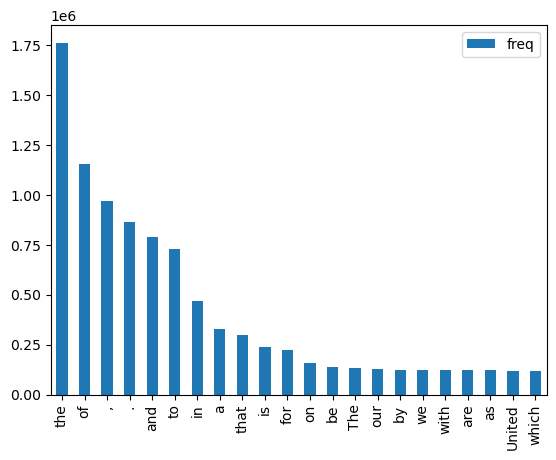

time: 718 ms (started: 2023-03-17 00:11:08 +01:00)


In [41]:
freq_df.head(22).plot(kind='bar')


<AxesSubplot: >

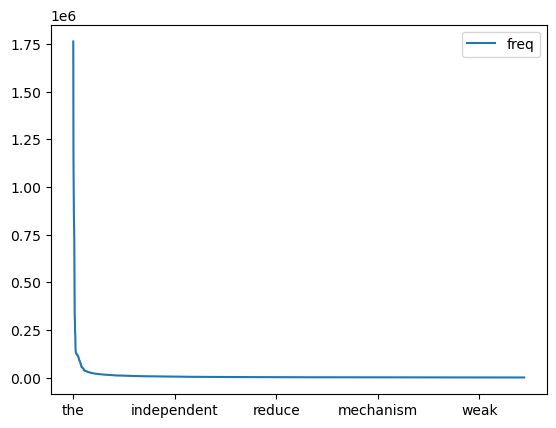

time: 88.9 ms (started: 2023-03-17 00:11:08 +01:00)


In [42]:
freq_df.head(2222).plot()

<AxesSubplot: >

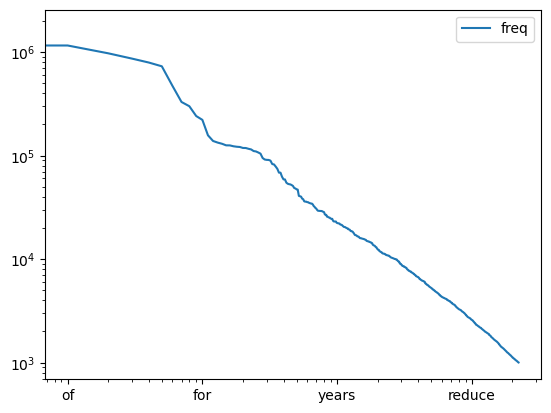

time: 329 ms (started: 2023-03-17 00:11:08 +01:00)


In [43]:
freq_df.head(2222).plot(loglog=True)

futher reading:  
https://en.wikipedia.org/wiki/Zipf's_law  
https://stats.stackexchange.com/questions/6780/how-to-calculate-zipfs-law-coefficient-from-a-set-of-top-frequencies

# Word cloud

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

(-0.5, 399.5, 199.5, -0.5)

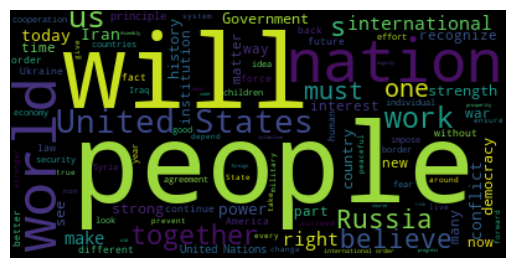

time: 151 ms (started: 2023-03-17 00:11:09 +01:00)


In [44]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

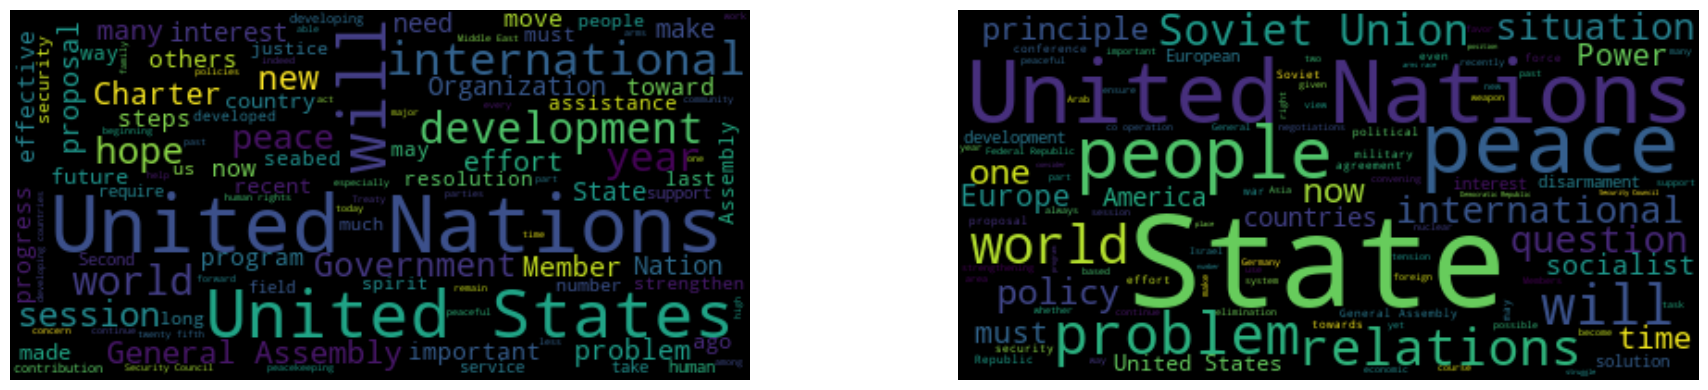

time: 383 ms (started: 2023-03-17 00:11:09 +01:00)


In [45]:
plt.subplots(1, 2, figsize=(20, 4))

text = df.query("country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

text = df.query("country=='RUS'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)

plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()

(-0.5, 399.5, 199.5, -0.5)

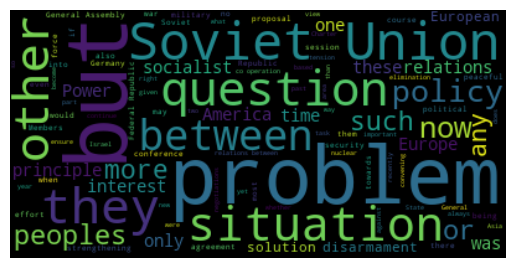

time: 155 ms (started: 2023-03-17 00:11:09 +01:00)


In [46]:
wc = WordCloud(max_words=100, stopwords=freq_df.head(50).index)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

the `generate_from_frequencies` function allows to generate without stopwords directly from a Counter:

(-0.5, 399.5, 199.5, -0.5)

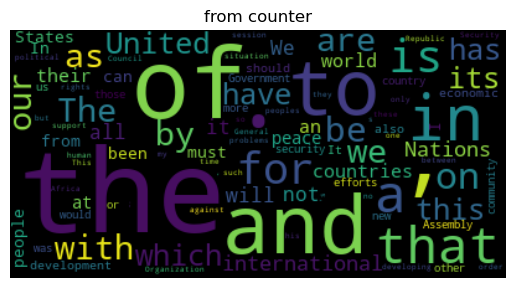

time: 183 ms (started: 2023-03-17 00:11:10 +01:00)


In [47]:
wc.generate_from_frequencies(counter)
plt.title('from counter')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Index

We want to build an inverted index:
- make a df such that for every type, we have a 1 if the document contains the type, 0 if not.
- for every type, give a list of document ids

# 🚧 todo:
- how many types do we have?
- how many documents do we have?

In [48]:
print(freq_df.shape[0], 'types')
print(df['text'].shape[0], 'documents')


95960 types
7507 documents
time: 346 µs (started: 2023-03-17 00:11:10 +01:00)


- we are checking with a small sub-sample first

In [49]:
list(freq_df.index[66:77])

['Organization',
 'political',
 'human',
 'Africa',
 'General',
 'support',
 'Council',
 'session',
 'rights',
 'only',
 "'s"]

time: 1.49 ms (started: 2023-03-17 00:11:10 +01:00)


In [50]:
df[33:36]

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,avg_wordsize
33,25,1970,KEN,Kenya,Mr. MUNGAI,unkown,"\n36.\t Mr. President, on behalf of His Excell...",21569,"[36, ., Mr., President, ,, on, behalf, of, His...",3769,5.722738
34,25,1970,KHM,Cambodia,Mr. KOUN WICK,unkown,4.\t Before I begin this speech I should like ...,27661,"[4, ., Before, I, begin, this, speech, I, shou...",4955,5.582442
35,25,1970,KWT,Kuwait,Mr. ALJABER,unkown,"1.\t Mr. President, your election to the aug...",17114,"[1, ., Mr., President, ,, your, election, to, ...",3017,5.672522


time: 6.14 ms (started: 2023-03-17 00:11:10 +01:00)


In [51]:
A = np.zeros((11, 3))
A.nbytes

264

time: 1.2 ms (started: 2023-03-17 00:11:10 +01:00)


we will first try the naïve way, to find out that this easily gets too slow:

In [52]:
for i,t in enumerate(freq_df.index[66:77]):
    for j,d in enumerate(df[33:36].tokens):
        if t in d: A[i,j] =1
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

time: 5.32 ms (started: 2023-03-17 00:11:10 +01:00)


In [53]:
A.nbytes

264

time: 1.03 ms (started: 2023-03-17 00:11:10 +01:00)


In [54]:
A = np.zeros((100, 7507))
for i,t in tqdm(enumerate(freq_df.index[:100])):
    for j,d in enumerate(df.tokens):
        if t in d: 
            A[i,j] =1
# optional (skip at first): can you do that loop more efficiently?
A

0it [00:00, ?it/s]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

time: 6.24 s (started: 2023-03-17 00:11:10 +01:00)


In [55]:
A.nbytes

6005600

time: 8.21 ms (started: 2023-03-17 00:11:16 +01:00)


### 🚧 todo:

What would be the size of the complete table?


In [56]:
# 🚧 todo:
print('There are 95960 tokens and 7507 texts.')
print('The shape of the complete table is (95960, 7507)')
B = np.zeros((95960, 7507))
print(f"The size of the complete table is {B.nbytes} bytes, which is equal to {B.nbytes/(1024**3)} GB.")
print()
# x gb

There are 95960 tokens and 7507 texts.
The shape of the complete table is (95960, 7507)
The size of the complete table is 5762973760 bytes, which is equal to 5.367187559604645 GB.

time: 830 µs (started: 2023-03-17 00:11:16 +01:00)


### 🚧 todo:

How long will it take to fill the complete table?


In [57]:
# 🚧 todo:
# my computer takes xxx
print('my computer will takes 959.6 * 6.2 = 5927.2 secs, 5927 % 60 = 98.7 mins, 98.7 % 60 = 1.64h')


my computer will takes 959.6 * 6.2 = 5927.2 secs, 5927 % 60 = 98.7 mins, 98.7 % 60 = 1.64h
time: 247 µs (started: 2023-03-17 00:11:16 +01:00)


### redoing the same thing with CountVectorizer

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

df[33:36].text

33    \n36.\t Mr. President, on behalf of His Excell...
34    4.\t Before I begin this speech I should like ...
35    1.\t   Mr. President, your election to the aug...
Name: text, dtype: object

time: 2.18 ms (started: 2023-03-17 00:11:16 +01:00)


In [59]:
vectorizer = CountVectorizer(vocabulary=freq_df.index[66:77], binary=True, min_df=0, lowercase=False)
# understand the options: 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
X = vectorizer.fit_transform(df[33:36].text)
print(vectorizer.get_feature_names_out())
print(X.toarray())


['Organization' 'political' 'human' 'Africa' 'General' 'support' 'Council'
 'session' 'rights' 'only' "'s"]
[[1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 0 1 1 1 1 0 1 0]
 [1 1 1 1 1 0 0 1 1 1 0]]
time: 8.33 ms (started: 2023-03-17 00:11:17 +01:00)


In [60]:
# make it pretty:
d = {c:X.toarray()[i] for i,c in enumerate(df[33:36].index)}
df_cv = pd.DataFrame.from_dict(d,  orient='index',columns=freq_df.index[66:77])
df_cv

,Organization,political,human,Africa,General,support,Council,session,rights,only,'s
33,1,1,1,1,1,1,1,1,1,1,0
34,1,1,1,0,1,1,1,1,0,1,0
35,1,1,1,1,1,0,0,1,1,1,0


time: 6.09 ms (started: 2023-03-17 00:11:17 +01:00)


## trying the complete set of documents with the complete vocabulary

In [61]:
vectorizer = CountVectorizer(vocabulary=freq_df.index, binary=True, min_df=0, lowercase=False)
X = vectorizer.fit_transform(df.text)
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
print(X.toarray())

95960
['the' 'of' ',' '.' 'and' 'to' 'in' 'a' 'that' 'is' 'for']
[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]
time: 10.4 s (started: 2023-03-17 00:11:17 +01:00)


- wow! comparably fast!

- can you get the vector of "the"? is there a speech that doesn't use it?


In [62]:
print(X[:,1])

  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (7482, 0)	1
  (7483, 0)	1
  (7484, 0)	1
  (7485, 0)	1
  (7486, 0)	1
  (7487, 0)	1
  (7488, 0)	1
  (7489, 0)	1
  (7490, 0)	1
  (7491, 0)	1
  (7492, 0)	1
  (7493, 0)	1
  (7494, 0)	1
  (7495, 0)	1
  (7496, 0)	1
  (7497, 0)	1
  (7498, 0)	1
  (7499, 0)	1
  (7500, 0)	1
  (7501, 0)	1
  (7502, 0)	1
  (7503, 0)	1
  (7504, 0)	1
  (7505, 0)	1
  (7506, 0)	1
time: 10.3 ms (started: 2023-03-17 00:11:27 +01:00)


In [63]:
print(np.all(X[:,1].toarray() == 1))

True
time: 6.07 ms (started: 2023-03-17 00:11:27 +01:00)


# a big vocabulary:
grab a pageview file here https://dumps.wikimedia.org/other/pageviews/2022/2022-01/

we produce a list of potential terms from it:

In [64]:
terms = []
for li in open('./pageviews-20220101-000000').read().strip().split('\n'):
    t=li.split()[1]
    if li[:2]=='en' and t[:5]!='File:':
        if t[:9]=='Category:':
            t=t[9:] # can be improved Page:, Template:, ...
        terms+=[t.replace('_',' ')]
terms = sorted(set(terms))
open('en.pages.txt','w').write('\n'.join(terms))

28574595

time: 4.62 s (started: 2023-03-17 00:11:27 +01:00)


In [65]:
Counter([len(t.split()) for t in terms]).most_common()

[(2, 566626),
 (3, 296255),
 (1, 190286),
 (4, 163357),
 (5, 92223),
 (6, 50354),
 (7, 27033),
 (8, 12671),
 (9, 7557),
 (10, 3782),
 (11, 1741),
 (12, 774),
 (13, 459),
 (14, 235),
 (15, 119),
 (16, 64),
 (17, 33),
 (19, 17),
 (18, 15),
 (23, 15),
 (20, 10),
 (22, 3),
 (21, 3),
 (25, 2),
 (30, 2),
 (24, 2),
 (27, 1),
 (40, 1)]

time: 303 ms (started: 2023-03-17 00:11:32 +01:00)


In [66]:
[t for t in terms if len(t.split())>33]

['Cneoridium dumosum (Nuttall) Hooker F. Collected March 26, 1960, at an Elevation of about 1450 Meters on Cerro Quemazón, 15 Miles South of Bahía de Los Angeles, Baja California, México, Apparently for a Southeastward Range Extension of Some 140 Miles']

time: 252 ms (started: 2023-03-17 00:11:32 +01:00)


- trying to index these terms

In [67]:
vectorizer = CountVectorizer(vocabulary=terms, binary=True, min_df=0, lowercase=False, ngram_range=(1,4))
X = vectorizer.fit_transform(df.text)

time: 45.6 s (started: 2023-03-17 00:11:32 +01:00)


In [68]:
print(vectorizer.get_feature_names_out()[:11])

[' (Person of Interest)' '! (The Dismemberment Plan album)'
 '! (The Song Formerly Known As)' '! (Trippie Redd album)'
 '! (disambiguation)' '!!!' '!!! (album)' '!!!Fuck You!!!'
 '!!!Fuck You!!! And Then Some' '!!Destroy-Oh-Boy!!' '!!Fuck you!!']
time: 263 ms (started: 2023-03-17 00:12:18 +01:00)


# Homework

complete the # 🚧 todo:

and
## find the most frequently encountered Wikipedia entity
- in number of speeches
- in number of occurrences

- which speech talks most about the "Union of African States"?




In number of speeches

In [69]:
X_matrix = X.toarray()
X_matrix[X_matrix > 0] = 1

frequency_speech = np.sum(X_matrix, axis=0)

time: 1min 31s (started: 2023-03-17 00:12:18 +01:00)


In [70]:
index = frequency_speech.argmax()

print(f"The most frequent entity in number of speeches is '{terms[index]}' with {max(frequency_speech)} appearances")

The most frequent entity in number of speeches is 'and' with 7507 appearances
time: 73.9 ms (started: 2023-03-17 00:13:50 +01:00)


In numbe of occurrences

In [71]:
X_matrix = X.toarray()

frequency_occurrences = np.sum(X_matrix, axis=0)

time: 39.9 s (started: 2023-03-17 00:13:50 +01:00)


In [72]:
index = frequency_occurrences.argmax()

print(f"The most frequent entity in number of occurrences is '{terms[index]}' with {max(frequency_occurrences)} appearances")

The most frequent entity in number of occurrences is 'and' with 7507 appearances
time: 83.8 ms (started: 2023-03-17 00:14:30 +01:00)


Which speech talks most about the "Union of African States"?

In [73]:
X_list = X_matrix[:, terms.index('Union of African States')]
Target_id = X_list.argmax()

print(f"Speech of id {Target_id} talks most about the 'Union of African States'")

Speech of id 4341 talks most about the 'Union of African States'
time: 117 ms (started: 2023-03-17 00:15:21 +01:00)


### Before submitting, check:
- I have not imported any other modules
- I have put explanations between the lines of code (either inline or in separate cells)
- My notebook runs all the way through when I hit
  1. the ↻ button and then
  2. the ⏩︎ button (remove or comment out cells that are too slow and not needed, such as installing or downloading sections).
  